In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [3]:
#Getting the path
os.getcwd()

'C:\\Users\\Shubham Buchunde\\Documents\\DL'

In [5]:
#Importing the dataset
data = pd.read_csv(r'C:\\Users\\Shubham Buchunde\\Documents\\DL\\Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv')

In [6]:
#Getting the shape of dataframe
data.shape

(5000, 24)

In [7]:
#List of names of columns
data.columns

Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateAdded',
       'reviews.dateSeen', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs'],
      dtype='object')

In [8]:
#Trim the dataset to get required two columns('reviews.text','reviews.rating')
data1 = data.iloc[:,18:21]

In [9]:
data1 = pd.DataFrame(data1)

In [10]:
data1

,reviews.rating,reviews.sourceURLs,reviews.text
0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...
1,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...
2,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...
3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...
4,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...
...,...,...,...
4995,5,http://reviews.bestbuy.com/3545/5025900/review...,This is a great tablet for the price. Amazon i...
4996,5,http://reviews.bestbuy.com/3545/5025900/review...,This tablet is the perfect size and so easy to...
4997,4,http://reviews.bestbuy.com/3545/5025900/review...,Purchased this for my son. Has room to upgrade...
4998,5,http://reviews.bestbuy.com/3545/5025900/review...,I had some thoughts about getting this for a 5...


In [11]:
#Deleting the extra column 
del data1['reviews.sourceURLs']

In [12]:
data1

,reviews.rating,reviews.text
0,3,I thought it would be as big as small paper bu...
1,5,This kindle is light and easy to use especiall...
2,4,Didnt know how much i'd use a kindle so went f...
3,5,I am 100 happy with my purchase. I caught it o...
4,5,Solid entry level Kindle. Great for kids. Gift...
...,...,...
4995,5,This is a great tablet for the price. Amazon i...
4996,5,This tablet is the perfect size and so easy to...
4997,4,Purchased this for my son. Has room to upgrade...
4998,5,I had some thoughts about getting this for a 5...


In [13]:
#Renaming the column name
data1 = data1.rename({
          'reviews.rating':'Rating',
    'reviews.text':'Reviews'
        }, axis='columns')

In [14]:
data1.shape

(5000, 2)

In [15]:
#Checking for null values in dataframe
data1.isnull().values.any()

False

Text(0, 0.5, 'frequency')

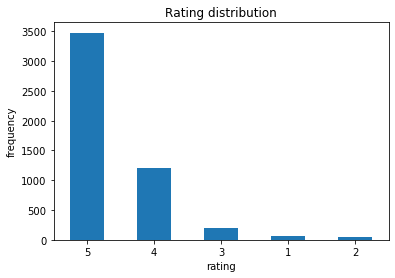

In [16]:
#Finding the Frequency of distribution of each Rating
count_classes = pd.value_counts(data1['Rating'],sort = True)
count_classes.plot(kind='bar',rot=0)
plt.title("Rating distribution")
plt.xticks(range(5))
plt.xlabel("rating")
plt.ylabel("frequency")

In [17]:
#Assigning the individual rating and checking its shape
rating_1 = data1[data1['Rating']==1]
rating_2 = data1[data1['Rating']==2]
rating_3 = data1[data1['Rating']==3]
rating_4 = data1[data1['Rating']==4]
rating_5 = data1[data1['Rating']==5]

In [18]:
#splitting the dataset to X(Independent variable) & Y (Dependent variable)
X=data1['Reviews']
y=data1['Rating']

In [20]:
#Checking the shape of individual rating
print(rating_1.shape,rating_2.shape,rating_3.shape,rating_4.shape,rating_5.shape)

(63, 2) (54, 2) (197, 2) (1208, 2) (3478, 2)


In [21]:
#importing the Bag Of words i.e CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(X)

In [22]:
X

<5000x5412 sparse matrix of type '<class 'numpy.int64'>'
	with 118997 stored elements in Compressed Sparse Row format>

In [24]:
#importing the library for handling imbalance dataset
from imblearn.combine import SMOTETomek


In [25]:
#handling the library for handling imbalance dataset
from imblearn.under_sampling import NearMiss

In [26]:
#object of class SMTETomek and fitting to overcome imbalancing
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_sample(X,y)

In [27]:
#shape of new dataset after handling imbalance dataset
X_res.shape,y_res.shape

((17384, 5412), (17384,))

In [28]:
#Importing the Counter for checking before and after handling the imbalance dataset
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({5: 3478, 4: 1208, 3: 197, 1: 63, 2: 54})
Resampled dataset shape Counter({3: 3478, 1: 3478, 2: 3478, 5: 3475, 4: 3475})


In [29]:
#importing the multinomialNB library for handling text dataset and building model
from sklearn.naive_bayes import MultinomialNB

In [30]:
#splitting the dataset to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [31]:
X_train

<13907x5412 sparse matrix of type '<class 'numpy.int64'>'
	with 482356 stored elements in Compressed Sparse Row format>

In [32]:
y_train

8256     1
10083    2
2133     5
8486     2
12590    3
        ..
11284    2
11964    3
5390     1
860      4
15795    4
Name: Rating, Length: 13907, dtype: int64

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(X) 

In [34]:
#object of class and fiting it to model
clf = MultinomialNB()
clf.fit(X_train,y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [35]:
#MultinomialNB model score for test dataset
clf.score(X_test,y_test)

0.7112453264308312

In [43]:
#checking the rating for new reviews
text = ["product is very good"]
vect = cv.transform(text).toarray()


In [44]:
#prediction of rating by using MultinomialNB model
my_prediction = clf.predict(vect)
my_prediction

In [47]:
#importing the RandomForestClassifier library 
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [48]:
#Training of model
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [49]:
#RandomForestClassifier model score for test dataset
result = model.score(X_test,y_test)
print(result)

0.8467069312625827


In [52]:
#checking the rating for new reviews
text = ["product is bad"]
vect = cv.transform(text).toarray()
my_prediction = model.predict(vect)
my_prediction

array([1], dtype=int64)

In [53]:
#importing the library for the KFOLd Crossvalidation
from sklearn.model_selection import KFold
k_Fold_valid = KFold(10)

In [55]:
#trainning the model with KFOLd Crossvalidation
import numpy as np
from sklearn.model_selection import cross_val_score
res = cross_val_score(model,X,y,cv=k_Fold_valid)
print(res)
print(np.mean(res))

[0.772 0.78  0.802 0.772 0.728 0.762 0.704 0.698 0.77  0.84 ]
0.7628


In [56]:
##importing the library for the ShuffleSplit Crossvalidation
from sklearn.model_selection import ShuffleSplit
ssplit = ShuffleSplit(n_splits=10,test_size=0.3)
resu = cross_val_score(model,X,y,cv=ssplit)
print(resu)
print(np.mean(resu))

[0.76466667 0.76866667 0.75133333 0.764      0.74733333 0.77466667
 0.76866667 0.752      0.74533333 0.774     ]
0.7610666666666666


In [58]:
#prediction of model
y_pred = model.predict(X_test)

In [59]:
#CONFUSION MATRIX
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print(cm)

[[688  14  13   0   0]
 [ 46 645  40   4   2]
 [ 19   8 613  12  10]
 [ 12  10  42 512  89]
 [  1   1  12 198 486]]


In [60]:
#Hyper parameter tuning using randomized search CV
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
param = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(param)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [62]:
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = model, param_distributions = param, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)



In [63]:
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 23.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 58.5min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [64]:
#Getting the best parameters
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 780,
 'criterion': 'gini'}

In [65]:
#Finding the accuracy
accuracy = rf_random.score(X_test, y_test)
print(accuracy)

0.8677020419902215
